In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df=pd.read_csv("home_price_prediction_data.csv")

In [3]:
df.head()

,house_size,price
0,1360,4080914
1,1794,5345446
2,1630,4954909
3,1595,4662713
4,2138,6467634


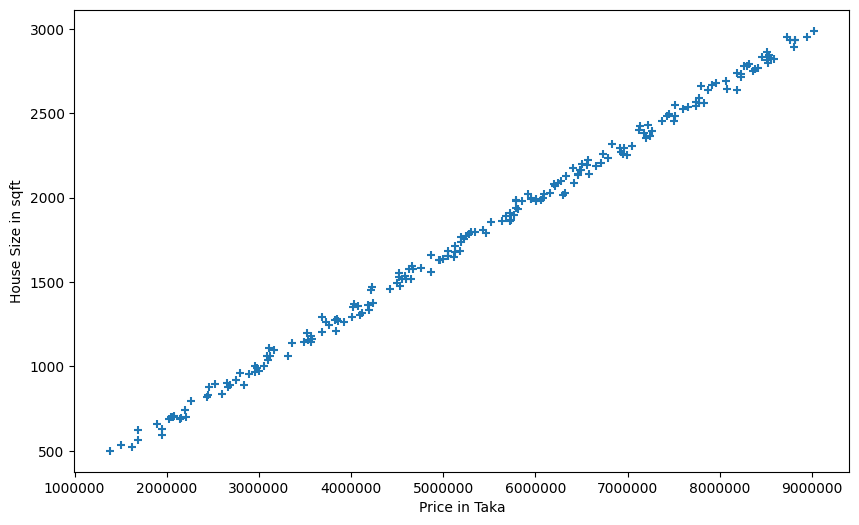

In [4]:

plt.figure(figsize=(10,6))
plt.scatter(data=df, x="price", y="house_size", marker="+")
plt.xlabel("Price in Taka")
plt.ylabel("House Size in sqft")

plt.ticklabel_format(style='plain', axis='x') # to eliminate the scientific number form
plt.show()

In [5]:
reg= linear_model.LinearRegression()
reg.fit(df[['house_size']] ,df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
reg.predict([[5000]])

C:\anaconda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15070901.52740949])

In [7]:
# to avoid warning
reg.predict(pd.DataFrame({'house_size': [1200]}))

array([3606487.89403762])

# house price prediction wiht multiple features

In [10]:
house_data = pd.read_csv("Housing.csv")


In [11]:
house_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [22]:
house_data.shape

(545, 13)

In [20]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
house_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
house_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [24]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<Figure size 800x600 with 0 Axes>

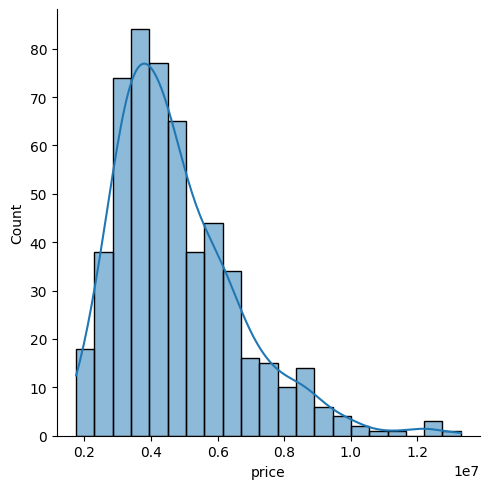

In [29]:
plt.figure(figsize=(8,6))
sns.displot(data=house_data,x=house_data.price,kde=True)
plt.show()

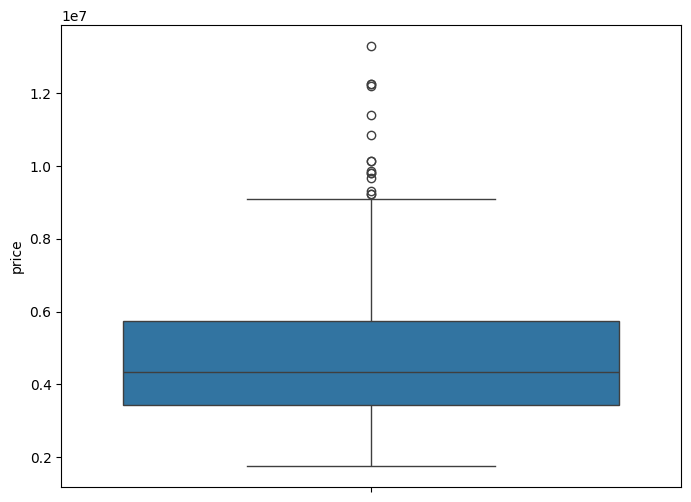

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=house_data,y=house_data.price)
plt.show()

In [55]:
categorical_data= [x for x in house_data.columns if house_data[x].dtype ==object]



In [56]:
for a in categorical_data: print(a)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


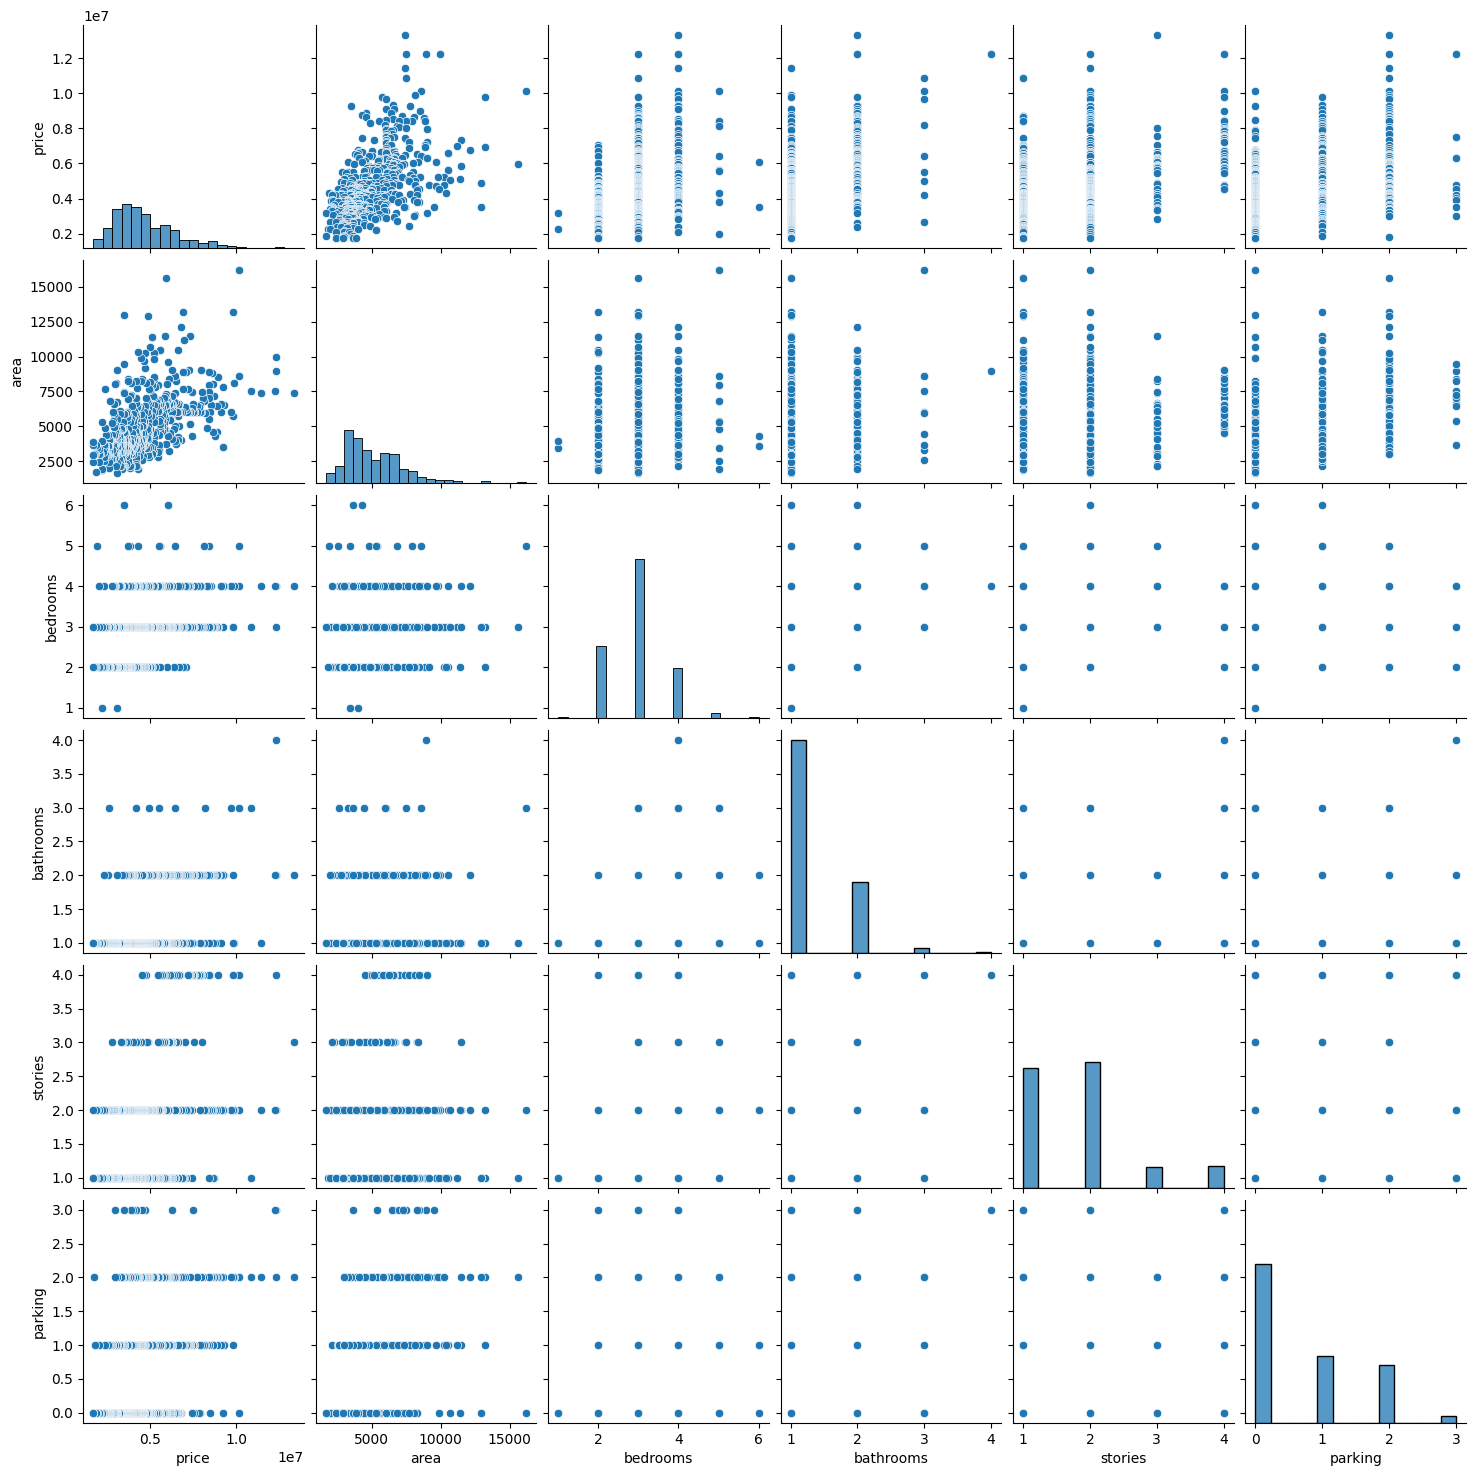

In [58]:
sns.pairplot(house_data)

<Axes: >

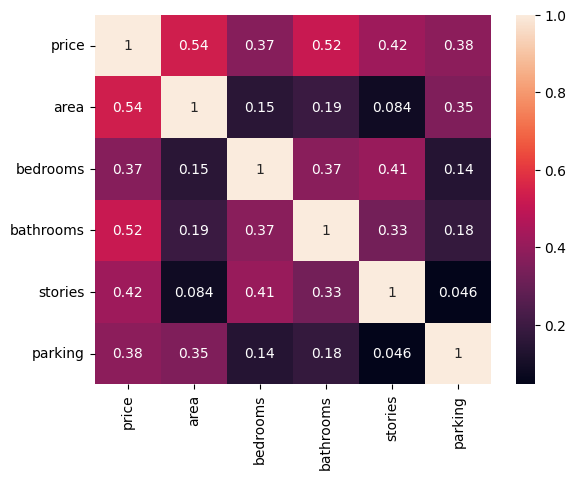

In [62]:
numerical_list = [x for x in house_data.columns if house_data[x].dtype in ('int64','float64')]

corr_matrix = house_data[numerical_list].corr()
sns.heatmap(corr_matrix, annot=True)

In [65]:
reg2= linear_model.LinearRegression()
reg2.fit(house_data[["area","bedrooms","bathrooms","stories","parking"]], house_data.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
reg2.predict(pd.DataFrame([{"area":7420,
                          "bedrooms": 4,
                          "bathrooms":2,
                          "stories":3,
                          "parking":2}]) )

array([7648873.96926546])